## Import files

In [3]:
import pandas as pd

root_directory = '/content/drive/My Drive/kaggle/KaKR 3 image classification'

df_train = pd.read_csv(root_directory + '/input/train.csv')
df_train.head()

,img_file,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class
0,train_00001.jpg,1,80,641,461,108
1,train_00002.jpg,57,53,293,236,71
2,train_00003.jpg,35,42,227,160,76
3,train_00004.jpg,10,21,254,165,188
4,train_00005.jpg,1,67,772,573,44


In [4]:
df_test = pd.read_csv(root_directory + '/input/test.csv')
df_test.head()

,img_file,bbox_x1,bbox_y1,bbox_x2,bbox_y2
0,test_00001.jpg,199,184,1116,809
1,test_00002.jpg,55,61,480,257
2,test_00003.jpg,42,123,602,413
3,test_00004.jpg,13,8,619,393
4,test_00005.jpg,8,9,209,93


In [5]:
df_class = pd.read_csv(root_directory + '/input/class.csv')
df_class.head()

,id,name
0,1,AM General Hummer SUV 2000
1,2,Acura RL Sedan 2012
2,3,Acura TL Sedan 2012
3,4,Acura TL Type-S 2008
4,5,Acura TSX Sedan 2012


## check number of images in train and test folders

In [10]:
import os

print(len(list(os.listdir(root_directory + '/cropped_images/train/cropped_train_images'))))

10016


In [11]:
print(len(list(os.listdir(root_directory + '/cropped_images/test/cropped_test_images'))))

6169


In [12]:
df_class.shape
# (196, 2) == 196 classes, 2 columns (id, classname)

(196, 2)

## Visualize the data

In [13]:
# python image library
from PIL import Image, ImageDraw

filenames = df_train.img_file[:4]
filenames.head(1) # let's see about 10 images

0    train_00001.jpg
Name: img_file, dtype: object

In [0]:
# import plotting library
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

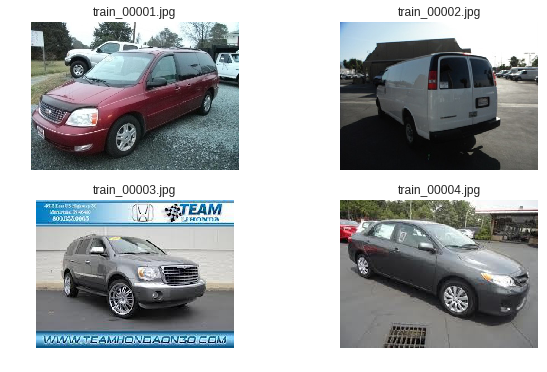

In [15]:
plt.figure(figsize=(10,6))

for index, filename in enumerate(filenames):
    img = Image.open(root_directory + '/input/train/' + filename)
    plt.subplot(2,2, index+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(filename)

## Crop the images with the provided bounding box (ONLY RUN WHEN CROPPING)

In [0]:
# referenced from https://www.kaggle.com/tmheo74/3rd-ml-month-car-image-cropping/output

TRAIN_IMG_PATH = root_directory + '/cropped_images/train/cropped_train_images'
TEST_IMG_PATH = root_directory + '/cropped_images/test/cropped_test_images'

def crop_boxing_img(img_name, margin=16) :
    if img_name.split('_')[0] == "train" :
        PATH = TRAIN_IMG_PATH
        data = df_train
    elif img_name.split('_')[0] == "test" :
        PATH = TEST_IMG_PATH
        data = df_test
        
    img = Image.open(PATH + img_name)
    pos = data.loc[data["img_file"] == img_name, \
                   ['bbox_x1','bbox_y1', 'bbox_x2', 'bbox_y2']].values.reshape(-1)

    width, height = img.size
    x1 = max(0, pos[0] - margin)
    y1 = max(0, pos[1] - margin)
    x2 = min(pos[2] + margin, width)
    y2 = min(pos[3] + margin, height)

    return img.crop((x1,y1,x2,y2))

In [0]:
CROPPED_TRAIN_IMAGE_FOLDER_PATH = '/cropped_train_images/'

for i, row in df_train.iterrows():
    if i % 100 == 0: print(i)
    cropped = crop_boxing_img(row['img_file'])
    cropped.save(CROPPED_TRAIN_IMAGE_FOLDER_PATH + row['img_file'])

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000


In [0]:
CROPPED_TEST_IMAGE_FOLDER_PATH = './cropped_test_images/'

for i, row in df_test.iterrows():
    if i % 100 == 0: print(i)
    cropped = crop_boxing_img(row['img_file'])
    cropped.save(CROPPED_TEST_IMAGE_FOLDER_PATH + row['img_file'])

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100


## Check and see it to verify

ValueError: ignored

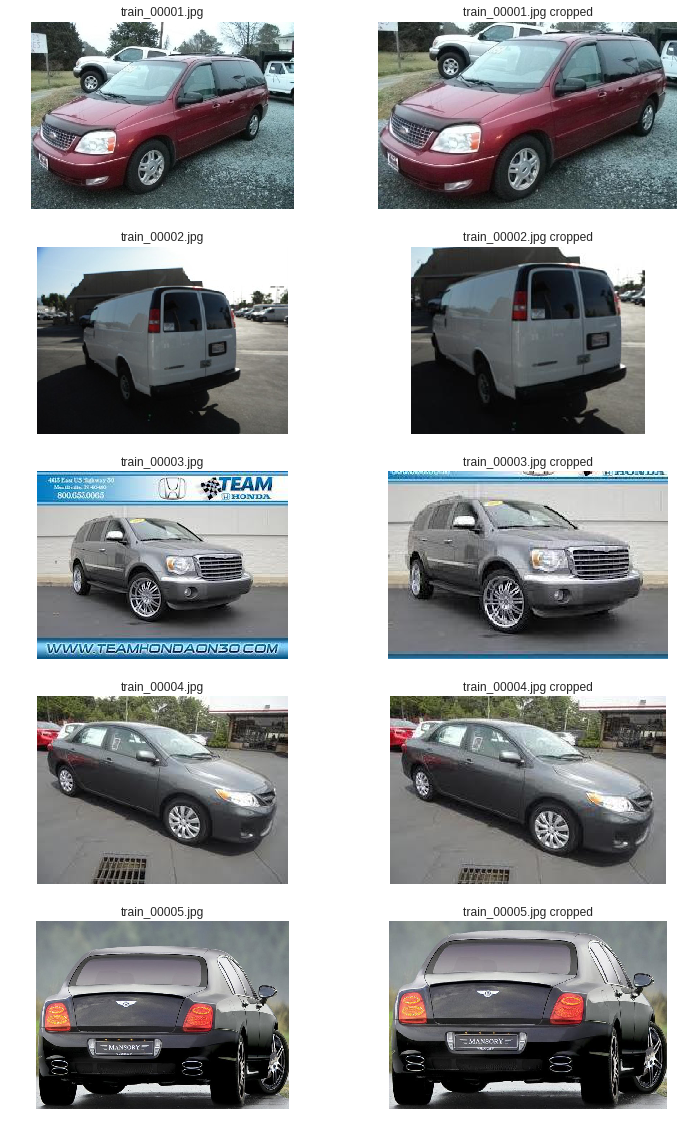

In [17]:
tmp_imgs = df_train['img_file'][:10]
plt.figure(figsize=(12,20))

for num, f_name in enumerate(tmp_imgs):
    img = Image.open(os.path.join(root_directory + '/input/train', f_name))
    plt.subplot(5, 2, 2*num + 1)
    plt.title(f_name)
    plt.imshow(img)
    plt.axis('off')
    
    img_crop = Image.open(os.path.join(TRAIN_IMG_PATH, f_name))
    plt.subplot(5, 2, 2*num + 2)
    plt.title(f_name + ' cropped')
    plt.imshow(img_crop)
    plt.axis('off')


## zip the cropped images into a .zip file (ONLY RUN AFTER CROP)

In [0]:
import zipfile
import glob

with zipfile.ZipFile('train_crop.zip','w') as zip: 
        # writing each file one by one
        for file in glob.glob('cropped_train_images/train*.jpg'): 
            zip.write(file)

In [0]:
with zipfile.ZipFile('test_crop.zip','w') as zip: 
        # writing each file one by one 
        for file in glob.glob('cropped_test_images/test*.jpg'): 
            zip.write(file)

## Shifting to colab

In [89]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
!unzip -uq "/content/drive/My Drive/kaggle/KaKR 3 image classification/cropped_images/test_crop.zip" -d "/content/drive/My Drive/kaggle/KaKR 3 image classification/cropped_images/test"


In [0]:
!unzip -u "/content/drive/My Drive/kaggle/KaKR 3 image classification/cropped_images/train_crop.zip" -d "/content/drive/My Drive/kaggle/KaKR 3 image classification/input/train"


## Building model with the cropped data

In [18]:
import os

IMAGE_PATH = '/cropped_images'
CSV_PATH = root_directory + '/input/'

os.listdir(root_directory + IMAGE_PATH)

['train_crop.zip', 'test_crop.zip', 'test', 'train']

In [19]:
import pandas as pd
import numpy as np

df_train = pd.read_csv(os.path.join(CSV_PATH, 'train.csv'))
df_train.head()

,img_file,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class
0,train_00001.jpg,1,80,641,461,108
1,train_00002.jpg,57,53,293,236,71
2,train_00003.jpg,35,42,227,160,76
3,train_00004.jpg,10,21,254,165,188
4,train_00005.jpg,1,67,772,573,44


In [20]:
df_train.shape

(10016, 6)

In [21]:
df_test = pd.read_csv(os.path.join(CSV_PATH, 'test.csv'))
df_test.head()

,img_file,bbox_x1,bbox_y1,bbox_x2,bbox_y2
0,test_00001.jpg,199,184,1116,809
1,test_00002.jpg,55,61,480,257
2,test_00003.jpg,42,123,602,413
3,test_00004.jpg,13,8,619,393
4,test_00005.jpg,8,9,209,93


In [22]:
df_test.shape

(6169, 5)

In [23]:
df_class = pd.read_csv(os.path.join(CSV_PATH, 'class.csv'))
df_class.head()

,id,name
0,1,AM General Hummer SUV 2000
1,2,Acura RL Sedan 2012
2,3,Acura TL Sedan 2012
3,4,Acura TL Type-S 2008
4,5,Acura TSX Sedan 2012


In [24]:
# check if we aren't missing any training images
set(list(df_train.img_file)) == set(os.listdir(root_directory + IMAGE_PATH+ '/train/cropped_train_images'))

True

In [25]:
print('number of training data', df_train.shape)
print('number of test data', df_test.shape)

number of training data (10016, 6)
number of test data (6169, 5)


In [26]:
df_class.shape

(196, 2)

In [27]:
from PIL import Image, ImageDraw

filenames = df_train.img_file[20:30]
filenames.head(10)

20    train_00021.jpg
21    train_00022.jpg
22    train_00023.jpg
23    train_00024.jpg
24    train_00025.jpg
25    train_00026.jpg
26    train_00027.jpg
27    train_00028.jpg
28    train_00029.jpg
29    train_00030.jpg
Name: img_file, dtype: object

# Modelling

## Splitting training set into train/validation sets

In [28]:
from sklearn.model_selection import train_test_split

df_train['class'] = df_train['class'].astype('str')

df_train = df_train[['img_file', 'class']]
df_test = df_test[['img_file']]

df_train.head() # removing the bounding box attributes from train data

,img_file,class
0,train_00001.jpg,108
1,train_00002.jpg,71
2,train_00003.jpg,76
3,train_00004.jpg,188
4,train_00005.jpg,44


In [29]:
index_list = np.arange(df_train.shape[0])
print(index_list)

[    0     1     2 ... 10013 10014 10015]


In [30]:
# splitting with train_test_split from sklearn.model_selection
train_idx, val_idx = train_test_split(index_list, train_size=0.8, random_state=42)

X_train = df_train.iloc[train_idx, :]
X_val = df_train.iloc[val_idx, :]

print(X_train.shape)
print(X_val.shape)
print(df_test.shape)

(8012, 2)
(2004, 2)
(6169, 1)


In [31]:
X_train.head()

,img_file,class
4766,train_04767.jpg,161
4851,train_04852.jpg,42
533,train_00534.jpg,37
132,train_00133.jpg,146
4885,train_04886.jpg,122


# Using Generator

In [32]:
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [76]:
# Parameter
img_size = (224, 224)
nb_train_samples = len(X_train)
nb_validation_samples = len(X_val)
nb_test_samples = len(df_test)
epochs = 20
batch_size = 32

# TRAIN_IMG_PATH = root_directory + IMAGE_PATH+ '/train/cropped_train_images'

DATA_PATH = root_directory + IMAGE_PATH

# Define Generator config
train_datagen = ImageDataGenerator(
    horizontal_flip = True,
    vertical_flip = False,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest',
    zoom_range = 0.10,
    rotation_range = 20,
    preprocessing_function=preprocess_input)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Make Generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe = X_train, 
    directory = root_directory + '/cropped_images/train/cropped_train_images',
    x_col = 'img_file',
    y_col = 'class',
    target_size = img_size,
    color_mode ='rgb',
    class_mode ='categorical',
    batch_size =batch_size,
    seed = 42
)

validation_generator = val_datagen.flow_from_dataframe(
    dataframe=X_val, 
    directory= root_directory + '/cropped_images/train/cropped_train_images',
    x_col = 'img_file',
    y_col = 'class',
    target_size = img_size,
    color_mode = 'rgb',
    class_mode = 'categorical',
    batch_size = batch_size,
    shuffle=False
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe = df_test,
    directory = root_directory + '/cropped_images/test/cropped_test_images',
    x_col = 'img_file',
    y_col = None,
    target_size = img_size,
    color_mode = 'rgb',
    class_mode = None,
    batch_size = batch_size,
    shuffle = False
)

Found 8012 validated image filenames belonging to 196 classes.
Found 2004 validated image filenames belonging to 196 classes.
Found 6169 validated image filenames.


# Loading pretrained model - ResNet50

In [77]:
resnet_model = ResNet50(include_top=False, input_shape=(224,224,3))
#resnet_model.summary()

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [78]:
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D

model = Sequential()
model.add(resnet_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(196, activation='softmax', kernel_initializer='he_normal'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_7 ( (None, 2048)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 196)               401604    
Total params: 23,989,316
Trainable params: 23,936,196
Non-trainable params: 53,120
_________________________________________________________________


In [79]:
# applying pretrained weights
model.load_weights(root_directory + '/weights/my_resnet_model_0.52_2.0760.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_7 ( (None, 2048)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 196)               401604    
Total params: 23,989,316
Trainable params: 23,936,196
Non-trainable params: 53,120
_________________________________________________________________


In [0]:
from keras import optimizers

optimizer = optimizers.RMSprop(lr=0.0001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
def get_steps(num_samples, batch_size):
    if (num_samples % batch_size) > 0 :
        return (num_samples // batch_size) + 1
    else:
        return num_samples // batch_size

In [82]:
%%time
from keras.callbacks import ModelCheckpoint, EarlyStopping

filepath = root_directory + "/model_checkpoints/resnet_model_{val_acc:.2f}_{val_loss:.4f}.h5"

ckpt = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True)
# es = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

callbackList = [ckpt]

history = model.fit_generator(
    train_generator,
    steps_per_epoch = get_steps(nb_train_samples, batch_size),
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = get_steps(nb_validation_samples, batch_size),
    callbacks = callbackList
)
gc.collect()

Epoch 1/20
251/251 [==============================] - 195s 776ms/step - loss: 1.2061 - acc: 0.6599 - val_loss: 1.3026 - val_acc: 0.6622

Epoch 00001: val_acc improved from -inf to 0.66218, saving model to /content/drive/My Drive/kaggle/KaKR 3 image classification/model_checkpoints/resnet_model_0.66_1.3026.h5
Epoch 2/20
251/251 [==============================] - 166s 661ms/step - loss: 0.8582 - acc: 0.7519 - val_loss: 1.0824 - val_acc: 0.7201

Epoch 00002: val_acc improved from 0.66218 to 0.72006, saving model to /content/drive/My Drive/kaggle/KaKR 3 image classification/model_checkpoints/resnet_model_0.72_1.0824.h5
Epoch 3/20
251/251 [==============================] - 168s 667ms/step - loss: 0.7086 - acc: 0.7881 - val_loss: 1.0521 - val_acc: 0.7246

Epoch 00003: val_acc improved from 0.72006 to 0.72455, saving model to /content/drive/My Drive/kaggle/KaKR 3 image classification/model_checkpoints/resnet_model_0.72_1.0521.h5
Epoch 4/20
251/251 [==============================] - 168s 668ms

NameError: ignored

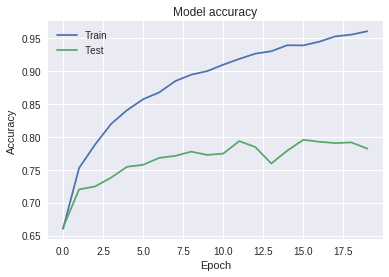

In [84]:
# Training History Visualization
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

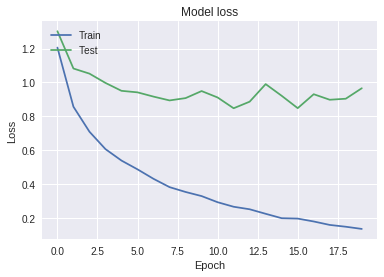

In [85]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [86]:
# Model Predict

%%time
test_generator.reset()
prediction = model.predict_generator(
    generator = test_generator,
    steps = get_steps(nb_test_samples, batch_size),
    verbose=1
)

193/193 [==============================] - 2265s 12s/step
CPU times: user 1min 5s, sys: 16.1 s, total: 1min 21s
Wall time: 37min 45s


In [91]:
predicted_class_indices=np.argmax(prediction, axis=1)

# Generator class dictionary mapping
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

submission = pd.read_csv(root_directory + '/input/sample_submission.csv')
submission["class"] = predictions
submission.to_csv(root_directory + '/input/submission.csv', index=False)
submission.head()

,img_file,class
0,test_00001.jpg,124
1,test_00002.jpg,98
2,test_00003.jpg,157
3,test_00004.jpg,94
4,test_00005.jpg,18
